# Написание методов

**Обязательно положите в текущую директорию файлы optimizers.py, run_experiments.py, utils.py**

Данный ноутбук посвящен освоению методов написания кода в методах оптимизации. Будут рассмотрены два подхода:
1. Через функции (хорошо подходит для домашних работ)
2. Через класс (хорошо подходит для больших проектов)

Рассматриваться будет градиентный спуск на квадртичной задаче:
$$ \min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x$$

## Реализация через функции

In [1]:
import numpy as np
from tqdm.notebook import tqdm
from jax import grad
from matplotlib import pylab as plt

`numpy` - библиотека, которая все векторизует;

`tqdm`- библиотека для отслеживания вычислений;

`jax` - библиотека для автоматического дифференцирования;

`matplotlib` - библиотека для отрисовки графиков.

In [ ]:
# Генерация матрицы
def gen_matrix(d, mu, L, s):

    # Your code

    return A

In [2]:
s = 2     # seed
L = 1000  # константа Липшица
mu = 1    # константа сильной выпуклости
d = 1     # размерность пространства

In [6]:
# np.random.seed(s)
# A = gen_matrix(d, mu, L, s)
# b = np.random.sample(d)
# x_0 = np.random.sample(d)

A = np.asarray([[1.0]])
b = np.asarray([10.0])
x_0 = np.asarray([100.0])

In [7]:
# Целевая функция
def f(x):
    return 1 / 2 * x.T @ A @ x - b.T @ x

# Аналитический градиент функции
def grad_f_analytical(x):
    return A @ x - b

# Autograd градиент функции
def grad_f_jax(x):
    return grad(f)(x)

In [8]:
print(grad_f_analytical(x_0))
print(grad_f_jax(x_0))

[90.]
[90.]


In [10]:
def GradientDescent(grad, criterion, x_0, eps, max_iter, **params):

    '''
       grad(x) - функция, которая считает градиент целевой функции;
       criterion(x) - функция, которая считает критерий;
       x_0 - начальная точка;
       eps - точность сходимости (обычно 1e-8);
       max_iter - количество итераций;
       **params - содержит именнованные гиперпараметры метода:
           params['gamma'](k) - шаг, зависящий от номера итерации.
    '''

    errors = []

    x_k = np.copy(x_0)
    err_x_0 = criterion(x_k)
    errors.append(criterion(x_k) / err_x_0)
    for k in tqdm(range(max_iter)):

        x_k -= params['gamma'](k) * grad(x_k)

        errors.append(criterion(x_k) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

In [19]:
def train(grad, criterion, x_0, eps, max_iter, **gammas):

    errors = []

    for gamma in gammas['gammas']:
        _, error = GradientDescent(grad, criterion, x_0, eps, max_iter, gamma=gamma)
        errors.append(error)

    return errors

In [13]:
def criterion(x):
    return np.linalg.norm(grad_f_analytical(x))

In [14]:
def gamma_1(k):
    return 1 / 100

def gamma_2(k):
    return 1 / 50

def gamma_3(k):
    return 1 / 20

In [20]:
gammas = [gamma_1, gamma_2, gamma_3]

In [22]:
errors = train(grad_f_analytical, criterion, x_0, 1e-6, 100, gammas=gammas)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
labels = ["1 / 100", "1 / 50", "1 / 20"]

In [24]:
def make_err_plot(errors, labels, title, markers=None, colors=None):

    markers = ['o', 'v', 's', 'p', 'x', 'P', 'D', '^', '<', '>']
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'black', 'olive', 'pink', 'brown']

    x_label = "Количество итераций"
    y_label = r"$||\nabla f(x^k)||$"

    plt.title(title, fontsize=25)
    plt.xlabel(x_label, fontsize=25)
    plt.ylabel(y_label, fontsize=25)

    for error, label, color, marker in zip(errors, labels, colors, markers):
        plt.semilogy(np.array(range(len(error))), error, color=color, label='gamma = ' + label, markevery=0.05, marker=marker)

    plt.legend(fontsize=17)
    plt.grid(True)

    plt.show()

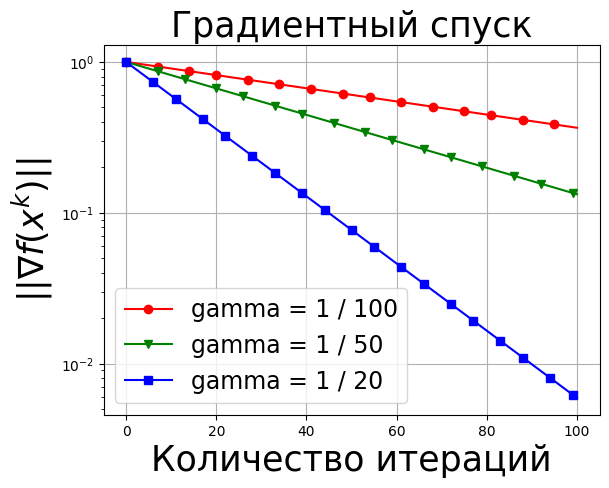

In [25]:
make_err_plot(errors, labels, "Градиентный спуск")

## Реализация через класс

In [1]:
import numpy as np

from optimizers import *
from utils import *
from run_experiments import *

In [2]:
s = 2     # seed
L = 1000  # константа Липшица
mu = 1    # константа сильной выпуклости
d = 1     # размерность пространства
func_name = "Reg" # имя функции

In [3]:
args = init_experiment(func_name, d=d, seed=s, L=L, mu=mu)

# np.random.seed(s)
# x_0 = np.random.sample(d)

x_0 = np.asarray([100.0])

In [4]:
args

{'func_name': 'Reg',
 'A': array([[1.]]),
 'b': array([10.]),
 'func': <function run_experiments.init_experiment.<locals>.<lambda>(x)>,
 'func_grad': <function run_experiments.init_experiment.<locals>.<lambda>(x)>}

In [5]:
def learning_rate_1(k):
    return 1 / 100

def learning_rate_2(k):
    return 1 / 50

def learning_rate_3(k):
    return 1 / 20

In [6]:
lr_list = [learning_rate_1, learning_rate_2, learning_rate_3]

optimizers_list = []
for lr in lr_list:
    opt = GDOptimizer(args, x_0, max_iter=100, err="grad", gamma=lr)
    opt.optimize()
    optimizers_list.append(opt)

100%|██████████| 100/100 [00:00<00:00, 44887.67it/s]


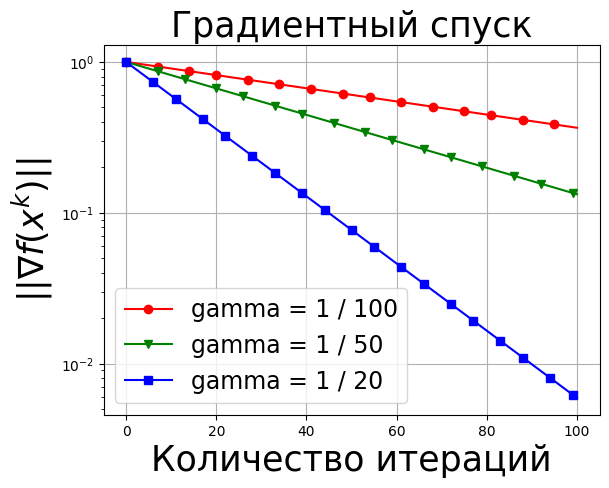

In [7]:
labels = ["1 / 100", "1 / 50", "1 / 20"]
make_err_plot(optimizers_list, labels, "Градиентный спуск")